In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2,os

data_path='/content/gdrive/MyDrive/Mask_Detection_using_OpenCV/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [3]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 68s 2s/step - loss: 0.7185 - accuracy: 0.4924 - val_loss: 0.6793 - val_accuracy: 0.5232
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
30/30 [==============================] - 53s 2s/step - loss: 0.6193 - accuracy: 0.6489 - val_loss: 0.4122 - val_accuracy: 0.8312
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
30/30 [==============================] - 53s 2s/step - loss: 0.3924 - accuracy: 0.8489 - val_loss: 0.3171 - val_accuracy: 0.8692
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
30/30 [==============================] - 52s 2s/step - loss: 0.2722 - accuracy: 0.9029 - val_loss: 0.2948 - val_accuracy: 0.9114
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
30/30 [==============================] - 53s 2s/step - loss: 0.2263 - accuracy: 0.9068 - val_loss: 0.3502 - val_accuracy: 0.8650
Epoch 6/20
30/30 [==============================] - 53s 2s/step - lo

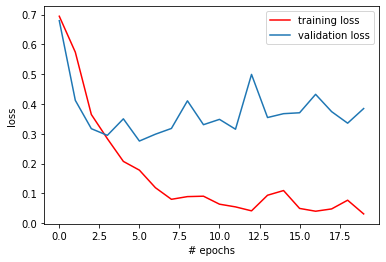

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


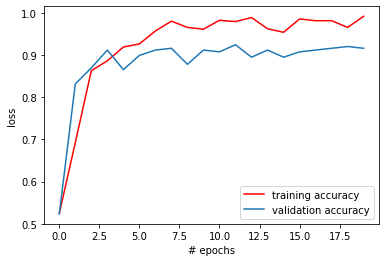

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 361ms/step - loss: 0.2750 - accuracy: 0.9242
[0.27499836683273315, 0.9242424368858337]


In [13]:
import cv2
import numpy as np
from keras.models import load_model

In [14]:
import tensorflow as tf

In [15]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [16]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib as mt
train_datagen=ImageDataGenerator()

test_datagen= ImageDataGenerator(rescale=1./255)

In [17]:
batch_size=10
train_data=train_datagen.flow_from_directory(
'/content/gdrive/MyDrive/Mask_Detection_using_OpenCV/train',
target_size=(150,150),
batch_size=batch_size,
class_mode='binary')

Found 1315 images belonging to 2 classes.


In [18]:
test_data=test_datagen.flow_from_directory(
'/content/gdrive/MyDrive/Mask_Detection_using_OpenCV/test/',
target_size=(150,150),
batch_size=batch_size,
class_mode='binary')

Found 194 images belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [21]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',
                             verbose=0,save_best_only=True,mode='auto')

In [22]:
model.save('mask_project.h5')

In [23]:
import cv2
import numpy as np
from keras.models import load_model

In [24]:
import tensorflow as tf

In [25]:
model = tf.keras.models.load_model('mask_project.h5')

In [26]:
import cv2
import numpy as np
from keras.models import load_model
model = tf.keras.models.load_model('mask_project.h5')

results={0:'without mask',1:'mask'}
GR_dict={0:(0,0,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(150,150))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: 
        break

cap.release()

cv2.destroyAllWindows()

AttributeError: ignored